## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (GridSearchCV,
                                     learning_curve,
                                     ShuffleSplit,
                                     train_test_split)
from sklearn.preprocessing import (LabelEncoder,StandardScaler)
from sklearn.metrics import mean_absolute_error,precision_score,recall_score

from sklearn.metrics import accuracy_score, classification_report


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import Data

In [2]:
data = pd.read_csv('/content/student-mat.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Take the final grade and converting that into a percentage
data['Grade'] = data['G3']/20*100

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,52.075949
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,22.907213
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,100.000000


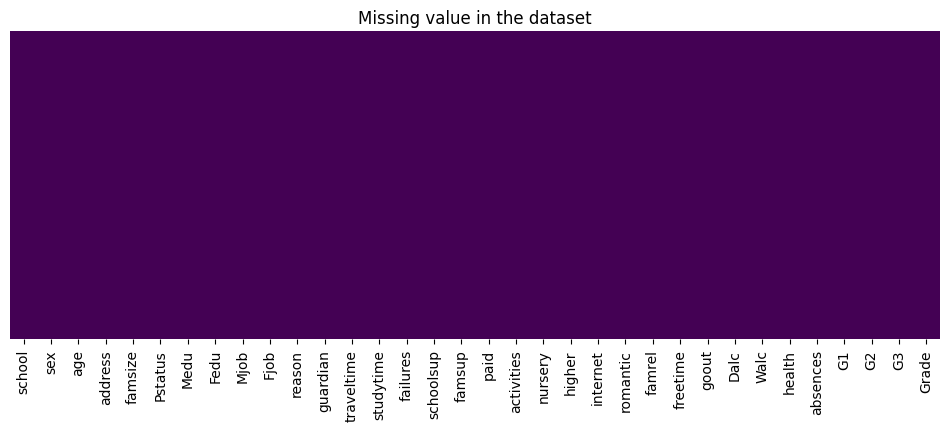

In [6]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

Note: As we can see there is no missing values so we can consider the other hypothesis.(The students who failed to show up for the test or who were denied permission to take it for another reason receive a score of '0').

### Does the school play any significant role in the grades of student?

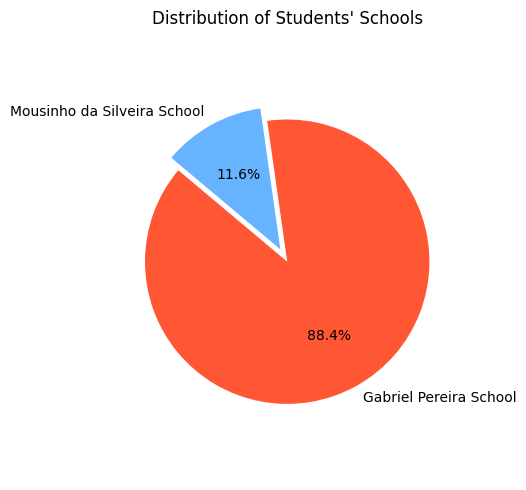

In [7]:
import matplotlib.pyplot as plt

# Calculate percentage values
total = len(data)
value_counts = data['school'].value_counts()
percentages = value_counts / total * 100

# Rename the labels from 'GP' and 'MS' to custom names
value_counts.index = ['Gabriel Pereira School', 'Mousinho da Silveira School']

# Define custom colors
custom_colors = ['#ff5733', '#66b3ff']  # A vibrant red and a bright blue

# Define an explode parameter to separate one of the sections
explode = (0.1, 0)  # This will explode the first section (Gabriel Pereira School) slightly

# Create a pie chart with custom colors and explode parameter
plt.figure(figsize=(5, 5))
plt.pie(
    percentages,
    labels=value_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=custom_colors,
    explode=explode  # Add the explode parameter here
)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title("Distribution of Students' Schools")

# Show the plot
plt.tight_layout()
plt.show()

### Number of students in different age groups

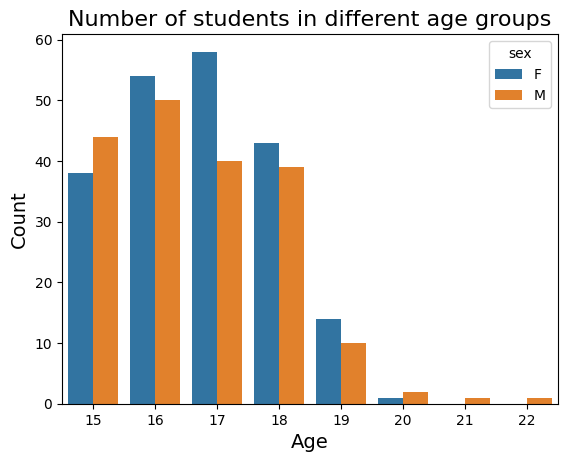

In [8]:
b = sns.countplot(x='age', hue='sex', data=data)
b.axes.set_title('Number of students in different age groups', fontsize=16)
b.set_xlabel("Age", fontsize=14)
b.set_ylabel("Count", fontsize=14)
plt.show()

### Count of students from urban and rural areas

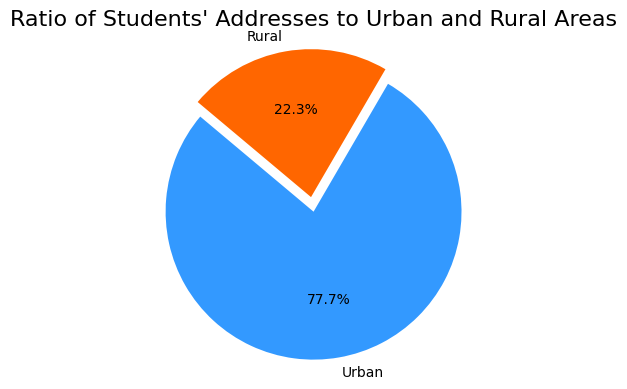

In [9]:
import matplotlib.pyplot as plt

# Calculate percentage values
total = len(data)
value_counts = data['address'].value_counts()
percentages = value_counts / total * 100

# Define custom colors for each part
colors = ['#3399ff', '#ff6600']

# Define the amount of space between the parts
explode = (0.1, 0)

# Define custom labels for the parts
custom_labels = ['Urban', 'Rural']

# Create a pie chart
plt.figure(figsize=(4, 4))  # Adjust the figure size if needed
plt.pie(
    percentages,
    labels=custom_labels,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=colors,  # Use custom colors
    explode=explode,  # Add space between parts
)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Update the title
plt.title("Ratio of Students' Addresses to Urban and Rural Areas", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


### Does the gender play any significant role in the grades of student?

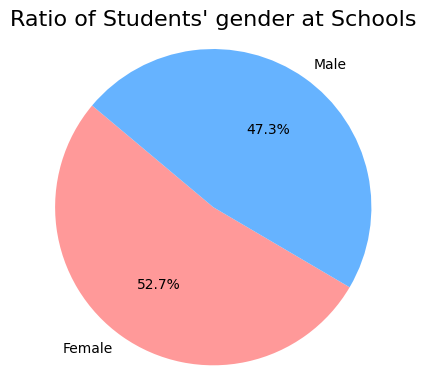

In [10]:
# Calculate percentage values
total = len(data)
value_counts = data['sex'].value_counts()
percentages = value_counts / total * 100

# Rename the labels from 'F' and 'M' to custom names
value_counts.index = ['Female', 'Male']

# Define custom colors
custom_colors = ['#ff9999', '#66b3ff']  # You can change these colors as desired


# Create a pie chart with custom colors and explode parameter
plt.figure(figsize=(4, 4))
plt.pie(
    percentages,
    labels=value_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=custom_colors,
    #explode=explode  # Add the explode parameter here
)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title("Ratio of Students' gender at Schools", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

## Measure Bias in Training data

### Protected Class: Sex

In [11]:
# Preliminary stats
breakdown_by_gender = pd.value_counts(data['sex'].values, sort=False)
breakdown_by_gender

F    208
M    187
Name: count, dtype: int64

In [12]:
female_students = data[data['sex'] == 'F']
male_students = data[data['sex'] == 'M']

print ('Mean grade% of female students = ', np.mean(female_students['Grade']))
print ('Median grade% of female students = ', np.median(female_students['Grade']))
print ('Mean grade% of male students = ', np.mean(male_students['Grade']))
print ('Median grade% of male students = ', np.median(male_students['Grade']))

Mean grade% of female students =  49.83173076923077
Median grade% of female students =  50.0
Mean grade% of male students =  54.57219251336898
Median grade% of male students =  55.00000000000001


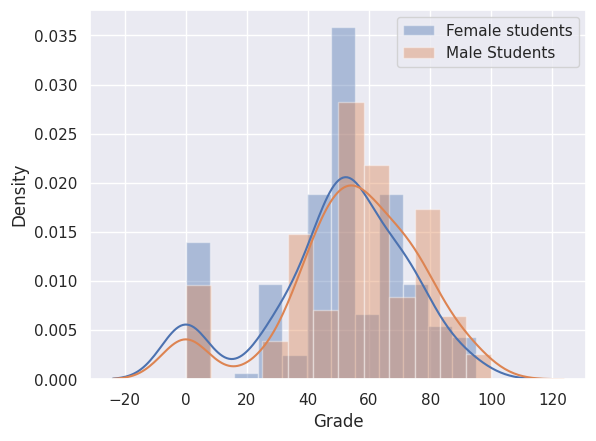

In [13]:
sns.set()

sns.distplot(female_students['Grade'], label='Female students')
sns.distplot(male_students['Grade'], label='Male Students')
plt.legend()
plt.show()

#### As we can see the mean and median scores for male students is higher than that of female students. Also the distribution of grades for male and female students show that in the training data, male students perform slightly better than female students. There is a possibility that a machine learning algorithm trained on this data will assume for all other features being the same, that a male student will score more than a female student.

### Protected Class: Previous Academic performance

In [14]:
data['failures'].value_counts()

failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64

In [15]:
# Preliminary stats
data['failed_before'] = data['failures'] != 0
breakdown_by_failed_before = pd.value_counts(data['failed_before'].values, sort=False)
breakdown_by_failed_before

False    312
True      83
Name: count, dtype: int64

In [16]:
failed_before = data[data['failed_before'] == True]
never_failed_before = data[data['failed_before'] == False]

print('Mean grade% of students who have failed before = ', np.mean(failed_before['Grade']))
print('Median grade% of students who have failed before = ', np.mean(failed_before['Grade']))
print('Mean grade% of students who have never failed before = ', np.mean(never_failed_before['Grade']))
print('Median grade% of students who have never failed before = ', np.median(never_failed_before['Grade']))


Mean grade% of students who have failed before =  36.325301204819276
Median grade% of students who have failed before =  36.325301204819276
Mean grade% of students who have never failed before =  56.26602564102564
Median grade% of students who have never failed before =  55.00000000000001


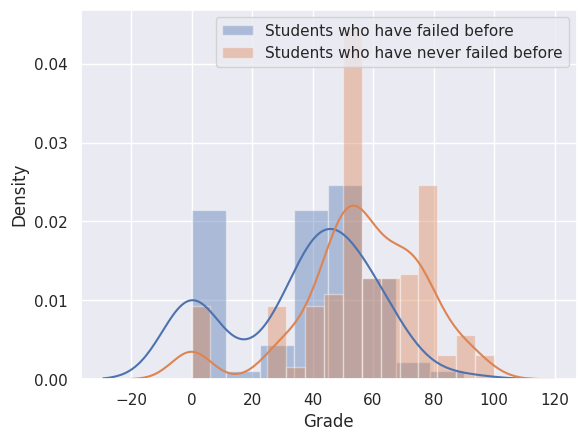

In [17]:
sns.set()

sns.distplot(failed_before['Grade'], label='Students who have failed before')
sns.distplot(never_failed_before['Grade'], label='Students who have never failed before')
plt.legend()
plt.show()

#### As we can see the mean and median scores for students who have never failed before is significantly higher than those who have failed before. While history is sometimes a good predictore of the future, a machine learning model trained on this dataset will be very harsh in terms of penalizing students who have failed before.

## Preprocessing and feature engineering

In [ ]:
# One hot encoding categorical features
nominal_features = ['Mjob',
'Fjob',
'reason',
'guardian']

# One hot encoding for all nominal features

data = pd.get_dummies(data, columns = nominal_features)

# Label encoding binary features
binary_features = [
'school',
'sex',
'address',
'famsize',
'Pstatus',
'schoolsup',
'famsup',
'paid',
'activities',
'nursery',
'higher',
'internet',
'romantic'
]

# Label Encoding for binary features

le = LabelEncoder()

for f in binary_features:
    if f =='sex':
        data['sex_lenc'] = le.fit_transform(data[f])
    else:
        data[f] = le.fit_transform(data[f])


In [20]:
features =  ['school', 'age','sex','Fjob', 'Mjob','Fedu' ,'Medu', 'failures', 'studytime',
                     'schoolsup', 'absences', 'internet', 'G1', 'G2', 'G3']

data1= data[features]

In [ ]:
cat_vars = ['school', 'Fjob', 'Mjob', 'sex', 'internet', 'schoolsup']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical variable
for var in cat_vars:
    data1[var] = label_encoder.fit_transform(data1[var])

# Display the modified DataFrame
print(data1)

In [27]:
X = data1.drop('G3',axis = 1)
y = data1['G3'].apply(lambda x: 'pass' if x >= 10 else 'fail')

# Creating training and testing sets
y=label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [28]:
# Create linear regression object
regr = LogisticRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The root mean squared error
print("Mean Absolute Error: %.2f %%"
      % (mean_absolute_error(y_test, y_pred)))


Mean Absolute Error: 0.08 %


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.9159663865546218
Precision: 0.92
Recall: 0.9452054794520548
F1-score: 0.9324324324324323


Confusion Matrix:
[[40  6]
 [ 4 69]]


## Testing models for bias against protected classes

In [30]:
!pip -q install aif360

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.8/229.8 kB 2.2 MB/s eta 0:00:00


In [31]:
import pandas as pd
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset
from IPython.display import Markdown, display
from aif360.algorithms.preprocessing.reweighing import Reweighing
import warnings
warnings.filterwarnings("ignore")

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [32]:
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
favorable_label = 1
unfavorable_label = 0

In [40]:
data2=data1
# Assuming 'G3' is the column name in your DataFrame data1
data2['Result'] = data1['G3'].apply(lambda x: 'pass' if x >= 10 else 'fail')
data2=data2.drop(['G3'],axis=1)

data2['Result'] = label_encoder.fit_transform(data2['Result'])
# Display the modified DataFrame
data2


,school,age,sex,Fjob,Mjob,Fedu,Medu,failures,studytime,schoolsup,absences,internet,G1,G2,Result
0,0,18,0,4,0,4,4,0,2,1,6,0,5,6,0
1,0,17,0,2,0,1,1,0,2,0,4,1,5,5,0
2,0,15,0,2,0,1,1,3,2,1,10,1,7,8,1
3,0,15,0,3,1,2,4,0,3,0,2,1,15,14,1
4,0,16,0,2,2,3,3,0,2,0,4,0,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,3,3,2,2,2,2,0,11,0,9,9,0
391,1,17,1,3,3,1,3,0,1,0,3,1,14,16,1
392,1,21,1,2,2,1,1,3,1,0,3,0,10,8,0
393,1,18,1,2,3,2,3,0,1,0,0,1,11,12,1


In [43]:
#Create binary label dataset that can be used by bias mitigation algorithms
bias_dataset = BinaryLabelDataset(favorable_label=favorable_label,
                                unfavorable_label=unfavorable_label,
                                df=data2,
                                label_names=['Result'],
                                protected_attribute_names=['sex', 'schoolsup'],
                                unprivileged_protected_attributes=unprivileged_groups)

In [44]:
#display(Markdown("#### Training Data Details"))
print("shape of the training dataset", bias_dataset.features.shape)
print("Training data favorable label", bias_dataset.favorable_label)
print("Training data unfavorable label", bias_dataset.unfavorable_label)
print("Training data protected attribute", bias_dataset.protected_attribute_names)
print("Training data privileged protected attribute (1:Male and 0:Female)",
      bias_dataset.privileged_protected_attributes)
print("Training data unprivileged protected attribute (1:Male and 0:Female)",
      bias_dataset.unprivileged_protected_attributes)

shape of the training dataset (395, 14)
Training data favorable label 1.0
Training data unfavorable label 0.0
Training data protected attribute ['sex', 'schoolsup']
Training data privileged protected attribute (1:Male and 0:Female) [array([1.]), array([1.])]
Training data unprivileged protected attribute (1:Male and 0:Female) [array([0.]), array([0.])]


In [45]:
metric_orig_train = BinaryLabelDatasetMetric(bias_dataset,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Difference in mean outcomes between unprivileged and privileged groups = %f" %
      metric_orig_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = -0.066459


## Removing the detected bias between both groups

In [47]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,
               privileged_groups=privileged_groups)
RW.fit(bias_dataset)
train_tf_dataset = RW.transform(bias_dataset)

In [48]:
metric_orig_train = BinaryLabelDatasetMetric(train_tf_dataset,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Difference in mean outcomes between unprivileged and privileged groups = %f"
      % metric_orig_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = 0.000000


### There's no unfair advantage between unprivileged and privileged groups